In [38]:
# Code for Principal Component Analysis
# By: Danish Ahmed Mehmuda
# U19EC111

import sys
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib.image import imread

(112, 92)


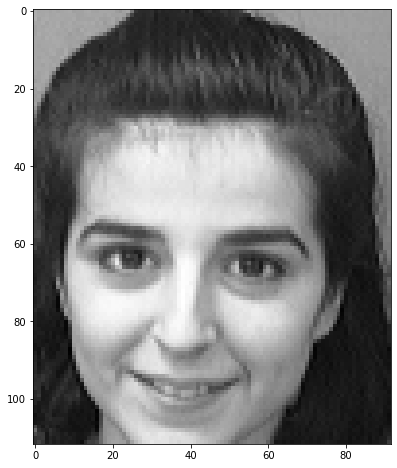

In [39]:
img = imread(sys.path[0] + '/PCAdata/f10.pgm')

print(img.shape)

plt.figure(figsize=[12,8])
plt.imshow(img, cmap=plt.cm.gray)

Number of components explaining 95% variance: 7


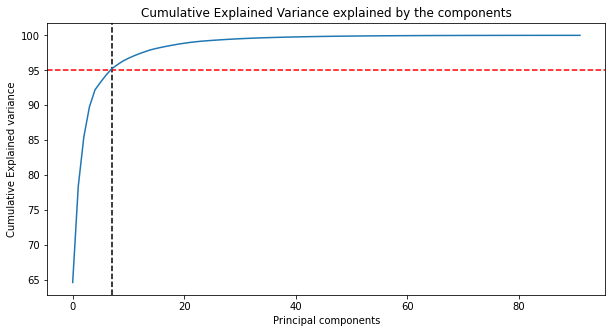

In [40]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(img)
 
# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
 
# Getting Principle Components for variance>95%
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")
 
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

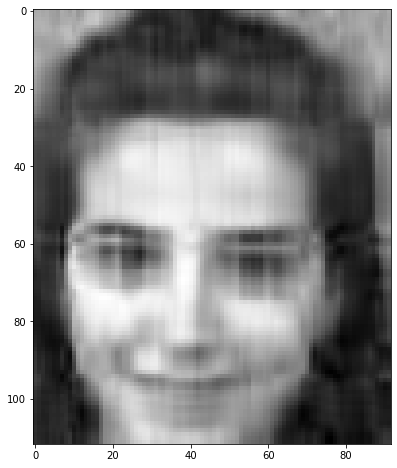

In [41]:
#Reconstructing using Inverse Transform
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(img))
 
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

In [42]:
# Function to plot for different Principal Components
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(img))
    plt.imshow(image_recon,cmap = plt.cm.gray)

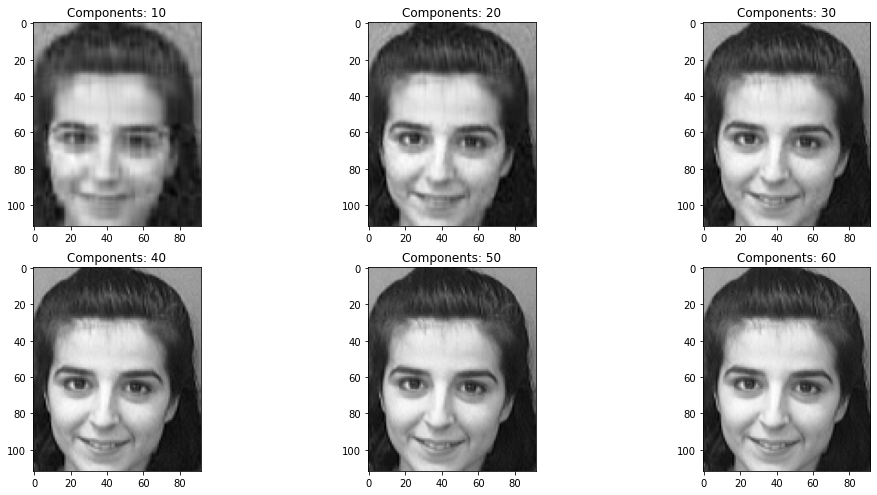

In [43]:
#setting different amounts of K
ks = [10, 20, 30, 40, 50, 60]
 
plt.figure(figsize=[15,9])
 
for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))
 
plt.subplots_adjust(wspace=1, hspace=0.0)
plt.show()